## Tutorial 3 - Extracting Product Information from Reviews
### LLM comparison:
- identifying product data (categories, brands, and other attributes) with LLM
- define similarity between products from the dataset and reviews

##### Authors:
- Hubert Bujakowski
- Jan Kruszewski
- Łukasz Tomaszewski

In [1]:
from dotenv import load_dotenv
import os
from mistralai import Mistral
load_dotenv()
apikey = os.getenv('apikey')
client = Mistral(api_key = apikey)

In [2]:
reviews = [
    # Thermal Mugs
    "Keeps my coffee hot for hours—just what I need for long workdays. Thanks, Contigo.",
    "The lid isn’t leak-proof, but it keeps drinks warm for a decent amount of time.",
    "Love the sleek design of my Zojirushi mug, and it fits perfectly in my car cup holder!",
    "It’s lightweight but keeps my drinks at the right temperature for hours with Hydro Flask.",
    "No more cold coffee! This Yeti thermal mug does the job.",
    "It’s easy to clean, and the thermal insulation works like a charm.",
    "The handle makes it easy to carry, and it doesn’t spill.",
    "Not great for keeping drinks cold, but excellent for hot beverages.",
    "I wish it were bigger, but it’s perfect for my morning tea.",
    "I accidentally dropped it, and it didn’t dent! Very sturdy.",
    "The rubber seal around the lid came loose after a few weeks. Disappointing.",
    "Great for both coffee and soup—keeps them warm for hours.",
    "The exterior stays cool, even when my drink is piping hot inside.",
    "I love the color options, and it’s great for on-the-go.",
    "Keeps ice water cold for hours, even in hot weather!",
    "It’s a little tricky to open one-handed, but overall, a great mug.",
    "The size is perfect for travel, and it keeps drinks hot all day.",
    "It doesn’t leak, even when I toss it in my bag. Highly recommend Contigo.",
    "The lid is a little tight, but the mug works well for keeping drinks warm.",
    "Very stylish and functional! I get compliments all the time.",
    "Keeps my coffee scalding hot for longer than any mug I’ve owned with Zojirushi.",
    "Great value for the price. Works just as well as more expensive brands.",
    "The mug is lightweight and easy to carry around.",
    "It fits perfectly under my single-serve coffee machine!",
    "Durable, sleek, and it does exactly what it’s supposed to.",

    # Dishwasher Detergents
    "My dishes come out sparkling clean every time with Cascade. Love this detergent!",
    "It works well on glass, but I’ve noticed spots on my silverware.",
    "Great for tough, greasy messes. Leaves no residue! Thanks, Finish.",
    "This detergent smells amazing and leaves my dishwasher fresh.",
    "It’s a little pricey, but my dishes have never looked better with Cascade Platinum.",
    "Gets rid of even the most stubborn baked-on food. Highly recommend Finish Quantum.",
    "Not the best on hard water stains, but otherwise it works great.",
    "My dishes have never been so spotless after a wash!",
    "It’s very effective, but I wish it came in a fragrance-free version.",
    "Cuts through grease like a dream. No more pre-rinsing with Cascade Complete.",
    "This detergent doesn’t leave any residue on plastic, which I love.",
    "My glasses come out clear and sparkling every single time.",
    "It doesn’t work well with my eco dishwasher. Dishes aren’t as clean.",
    "Very efficient—gets rid of food stains and smells with no problem.",
    "I noticed some streaks on my glassware, but overall it works well.",
    "Leaves my dishes spotless and my machine smelling fresh.",
    "A great, eco-friendly option that actually works!",
    "It’s a little hard on some of my delicate dishware.",
    "This is the only detergent that works on my hard water stains.",
    "No need to rewash dishes after using this—so efficient!",
    "Perfect for everyday use. My dishes are clean and shiny.",
    "Leaves a chemical smell, but it’s effective at cleaning.",
    "A bit expensive, but worth it for the spotless results.",
    "No more streaks or water spots! Best dishwasher detergent ever.",
    "My silverware and dishes look brand new after every wash.",

    # Sunscreens
    "Absorbs quickly and doesn’t leave a greasy residue. Great for daily use with Neutrogena.",
    "The scent is a little strong, but it protects well with Coppertone.",
    "Perfect for sensitive skin! No breakouts or irritation with La Roche-Posay.",
    "A bit thick to apply, but once it’s on, it stays all day.",
    "I love the lightweight formula of CeraVe, perfect for wearing under makeup.",
    "Doesn’t leave a white cast, even on darker skin tones.",
    "The spray bottle makes it super easy to apply on the go.",
    "This sunscreen saved me from burning on a beach vacation with Banana Boat!",
    "It’s waterproof, which is a must for pool days. Highly recommend Hawaiian Tropic.",
    "A bit pricey, but the protection it provides is worth every penny with Supergoop.",
    "This is my go-to sunscreen for both my face and body with Neutrogena.",
    "It’s a little greasy, but it gets the job done in strong sun.",
    "No weird scent, and it goes on smooth. Love this product!",
    "Perfect for outdoor activities—no sunburn, even after hours outside.",
    "It’s great for kids! No irritation, and it’s easy to apply with Blue Lizard.",
    "A little too heavy for my face, but works perfectly for the body.",
    "The texture is nice and light, not sticky at all.",
    "This sunscreen doesn’t clog my pores, which is a huge plus with EltaMD.",
    "I’ve tried a lot of sunscreens, and this one offers the best protection with La Roche-Posay.",
    "It leaves a slight sheen, but I love how protected my skin feels.",
    "This formula doesn’t dry out my skin like others do.",
    "It’s great under makeup—no pilling or greasiness.",
    "I wish it were more affordable, but it’s worth it for the protection.",
    "Very effective, even after swimming for hours.",
    "My skin stays soft and protected all day with Neutrogena sunscreen."

     # Powder Detergents for Laundry
    "Gets my clothes fresh and clean every time. No lingering odor with Tide.",
    "It dissolves well, even in cold water. My whites have never been brighter thanks to Ariel.",
    "A little pricey, but worth it for the excellent stain removal power of Persil.",
    "This powder leaves a residue on darker clothes. Not a fan of OMO.",
    "Great for sensitive skin! No itching or redness after using Seventh Generation.",
    "I love how eco-friendly this detergent is. It’s a big plus for me with Ecover.",
    "I don’t need fabric softener anymore—this leaves my clothes so soft!",
    "My laundry has never smelled so fresh, and it lasts for days with Gain.",
    "It’s not the best for heavy stains but works great for daily washes.",
    "Great value for the price. This box lasts forever! Thanks, Arm & Hammer.",
    "Perfect for my workout gear—gets rid of all the sweat smells.",
    "Leaves a bit of powder behind in the machine, but it cleans well.",
    "I’ve been using it for years, and Tide never disappoints.",
    "Not as effective in hard water areas, but still decent.",
    "My go-to detergent for all of my family’s laundry needs.",
    "I noticed some fading in my darker clothes after a few washes.",
    "It’s gentle on my baby’s clothes and skin with Dreft.",
    "Very effective at removing mud and grass stains from the kids’ clothes.",
    "I like the scent, but it might be too strong for some.",
    "No complaints so far! My clothes feel clean and fresh.",
    "Works just as well as liquid detergents but at a lower cost.",
    "A bit too perfumed for my taste, but it gets the job done.",
    "My clothes are noticeably softer and smell better than before.",
    "The box is hard to pour from, but the detergent works well.",
    "This is my new favorite detergent. So much better than the leading brand!",
]

In [126]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline
import re
model_name = "meta-llama/Meta-Llama-3-8B-Instruct"

prompt_template = """
Extract information from the following reviews:
{content}

Return ONLY the JSON format with the following JSON schema:

{{
        "product category": {{
            "type": "string",
            "enum": ["Powder Detergents for Laundry", "Thermal Mugs", "Dishwasher Detergents", "Sunscreens", "Nappies", "Others"]
        }},
        "brand": {{
            "type": "string" or "N/A"
        }},
        "other keywords": {{
            "type": "array",
            "items": {{
                "type": "string"
            }}
        }},
}}
"""

def create_bnb_config():
    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.bfloat16,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_use_double_quant=True,
    )
    return quantization_config

tokenizer = AutoTokenizer.from_pretrained(model_name)

bnb_config = create_bnb_config()

device_map = {"": 0}

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)

pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

def run_llama3(user_message, model_pipeline=pipe):
    prompt = prompt_template.format(content=user_message)
    messages = [
        {"role": "user", "content": {prompt}},
    ]
    response = model_pipeline(messages, max_length=500, num_return_sequences=1, temperature=0.1)
    answer = response[0]["generated_text"][1]['content']
    pattern = r'```(.*?)```'
    match = re.search(pattern, answer, re.DOTALL)
    json_output = str(match.group(1).strip())
    return json_output

Loading checkpoint shards: 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]


In [127]:
import json

def compare_json_objects(obj1, obj2, keys_to_compare={'other keywords', 'brand', 'product category'}):
    identical_fields = 0
    common_keys = set(obj1.keys()) & set(obj2.keys() & keys_to_compare)
    for key in common_keys:
        identical_fields += obj1[key] == obj2[key]
    percentage_identical = (identical_fields / max(len(keys_to_compare), 1)) * 100

    return percentage_identical

In [128]:
from tqdm import tqdm

In [129]:
results = {}
for review in tqdm(reviews):
  ans = run_llama3(review)
  response = json.loads(ans)
  results[review] = response
import json
with open('results_llama3.json', 'w') as f:
  json.dump(results, f, indent=4)

100%|██████████| 99/99 [11:12<00:00,  6.79s/it]


In [130]:
product_offers = [
    # Thermal Mugs
    "Contigo Workday Travel Mug – Keeps Coffee Hot for Hours!",
    "Zojirushi Sleek Travel Mug – Perfect Fit for Car Holders",
    "Hydro Flask Lightweight Insulation Mug – Stay Warm for Hours",
    "Yeti Thermal Mug – No More Cold Coffee!",
    "Contigo All-Day Heat Retention Mug – Ideal for Travel",
    "Contigo Leak-Proof Mug – Toss in Your Bag with Confidence",
    "Zojirushi Scalding Hot Coffee Mug – Best Insulation Yet",

    # Dishwasher Detergents
    "Cascade Sparkling Clean Detergent – Your Dishes Will Shine",
    "Finish Detergent – Tough on Grease, No Residue Left",
    "Cascade Platinum Detergent – Pricey, But Worth It for Results",
    "Finish Quantum Detergent – Stubborn Food Stains Gone",
    "Cascade Complete Detergent – No Pre-Rinsing Needed for Grease",

    # Sunscreens
    "Neutrogena Daily Sunscreen – Quick Absorption, No Grease",
    "Coppertone Suncream – Strong Scent, Strong Protection",
    "La Roche-Posay Sensitive Skin Sunscreen – No Breakouts",
    "CeraVe Lightweight Sunscreen – Perfect Under Makeup",
    "Banana Boat Beach-Saver Sunscreen – No Burns, Just Fun",
    "Hawaiian Tropic Waterproof Sunscreen – Pool Day Essential",
    "Supergoop Premium Sunscreen – Worth Every Penny",
    "Neutrogena Face & Body Sunscreen – All-Purpose Protection",
    "EltaMD Pore-Friendly Sunscreen – Protection Without Clogging",
    "La Roche-Posay Suncream – The Best in Sun Protection",
    "Neutrogena Sunscreen – Soft, Protected Skin All Day",

    # Powder Detergents for Laundry
    "Tide Powder Detergent – Fresh, Clean Clothes Every Time",
    "Ariel Powder Detergent – Whites Brighter, Even in Cold Water",
    "Persil Powder Detergent – Powerful Stain Removal",
    "OMO Powder Detergent – Leaves Residue on Dark Clothes",
    "Seventh Generation Powder Detergent – Great for Sensitive Skin",
    "Ecover Eco-Friendly Detergent – Perfect for the Eco-Conscious",
    "Gain Powder Detergent – Fresh-Smelling Laundry for Days",
    "Arm & Hammer Powder Detergent – Great Value, Lasts Forever",
    "Dreft Baby Powder Detergent – Gentle on Baby Clothes"
]

In [131]:
products = {}
for offer in tqdm(product_offers):
  ans = run_llama3(offer)
  response = json.loads(ans)
  products[offer] = response
import json
with open('products_llama3.json', 'w') as f:
  json.dump(products, f, indent=4)

100%|██████████| 32/32 [03:38<00:00,  6.83s/it]


In [135]:
def compare_json_objects_with_keywords(obj1, obj2, keys_to_compare={'other keywords', 'brand', 'product category'}):
    if obj1.get('product category') != obj2.get('product category'):
        return 0  # No similarity if categories don't match

    similarity_score = 0
    common_keys = set(obj1.keys()) & set(obj2.keys() & keys_to_compare)

    if obj1.get('product category') == obj2.get('product category'):
        similarity_score += 0.3  # Base similarity for matching categories

    if obj1.get('brand') == obj2.get('brand'):
        similarity_score += 0.4  # Additional similarity for matching brands

    for key in common_keys:
        if key == 'other keywords':
            if isinstance(obj1.get(key), list) and isinstance(obj2.get(key), list):
                common_keywords = set(obj1.get(key)) & set(obj2.get(key))
                similarity_score += len(common_keywords) * 0.05  # Keywords have lower weight
            else:
                similarity_score += 0


    return min(100, round(similarity_score * 100))

In [150]:
import pandas as pd

reviews_list = list(results.keys())
products_list = list(products.keys())

df = pd.DataFrame(columns=reviews_list, index=products_list)

In [163]:
for product in products_list:
    for review in reviews_list:
        try:
            similarity = compare_json_objects_with_keywords(products[product], results[review])
        except AttributeError:
            similarity = compare_json_objects_with_keywords(products[product][0], results[review])
        df.at[product, review] = similarity

In [181]:
from bert_score import score

def compare_product_review_similarity(review_data, product_data):
  """
  Calculates a similarity score between a review and a product based on
  categories, brands, and keywords, including a comparison of full product
  title with review information using BERTScore.
  """

  similarity_score = 0

  # Category Matching (Highest weight)
  if review_data.get('product category') == product_data.get('product category'):
    similarity_score += 0.5

  # Brand Matching (Medium weight)
  if review_data.get('brand') == product_data.get('brand'):
    similarity_score += 0.3

  # String Comparison (BERTScore) between Product Title and Review Data
  review_info_string = " ".join(
      [
          review_data.get("product category"),
          review_data.get("brand"),
          " ".join(review_data.get("other keywords")),
      ]
  )

  product_info_string = " ".join(
      [
          product_data.get("product category"),
          product_data.get("brand"),
          " ".join(product_data.get("other keywords")),
      ]
  )

  P, R, F1 = score(
      [product_info_string],
      [review_info_string],
      lang="en",
      model_type="bert-base-uncased",
      verbose=False,
      device="cuda:2",
  )

  similarity_score += F1.mean().item() * 0.2

  return round(min(1, similarity_score) * 100)

In [182]:
import pandas as pd

reviews_list = list(results.keys())
products_list = list(products.keys())

df2 = pd.DataFrame(columns=reviews_list, index=products_list)

In [183]:
for product in tqdm(products_list):
    for review in reviews_list:
        try:
            similarity = compare_product_review_similarity(products[product], results[review])
        except AttributeError:
            similarity = compare_product_review_similarity(products[product][0], results[review])
        df2.at[product, review] = similarity

100%|██████████| 32/32 [29:15<00:00, 54.85s/it]


In [186]:
df2.to_csv('2_llama3_similarity_scores.csv')

In [187]:
df.to_csv('1_llama3_similarity_scores.csv')

# Loading mistral data

In [190]:
mistral_reviews = json.load(open('./results/results.json'))
mistral_products = json.load(open('./results/products.json'))

In [192]:
import pandas as pd

reviews_list = list(mistral_reviews.keys())
products_list = list(mistral_products.keys())

mistral_df = pd.DataFrame(columns=reviews_list, index=products_list)

In [193]:
for product in products_list:
    for review in reviews_list:
        similarity = compare_json_objects_with_keywords(mistral_products[product], mistral_reviews[review])
        mistral_df.at[product, review] = similarity

In [195]:
mistral_df.to_csv('1_mistral_similarity_scores.csv')

In [214]:
import pandas as pd

reviews_list = list(mistral_reviews.keys())
products_list = list(mistral_products.keys())

mistral_df2 = pd.DataFrame(columns=reviews_list, index=products_list)

for product in tqdm(products_list):
    for review in reviews_list:
        # some of the reviews have "other_keywords" instead of "other keywords"
        try:
            mistral_reviews[review]["other keywords"] = mistral_reviews[review].pop("other_keywords")
        except:
            pass
        try:
            mistral_reviews[review]['product category'] = mistral_reviews[review].pop('product_category')
        except:
            pass
        try:
            similarity = compare_product_review_similarity(mistral_products[product], mistral_reviews[review])
        except:
            similarity = 'Error'
        mistral_df2.at[product, review] = similarity

100%|██████████| 32/32 [28:16<00:00, 53.02s/it]


In [216]:
mistral_df2.to_csv('2_mistral_similarity_scores.csv')

In [220]:
# if error occurs change it to 0
mistral_df2 = mistral_df2.replace('Error', 0)

/tmp/ipykernel_1105640/4232974537.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mistral_df2 = mistral_df2.replace('Error', 0)


# Similarities analysis

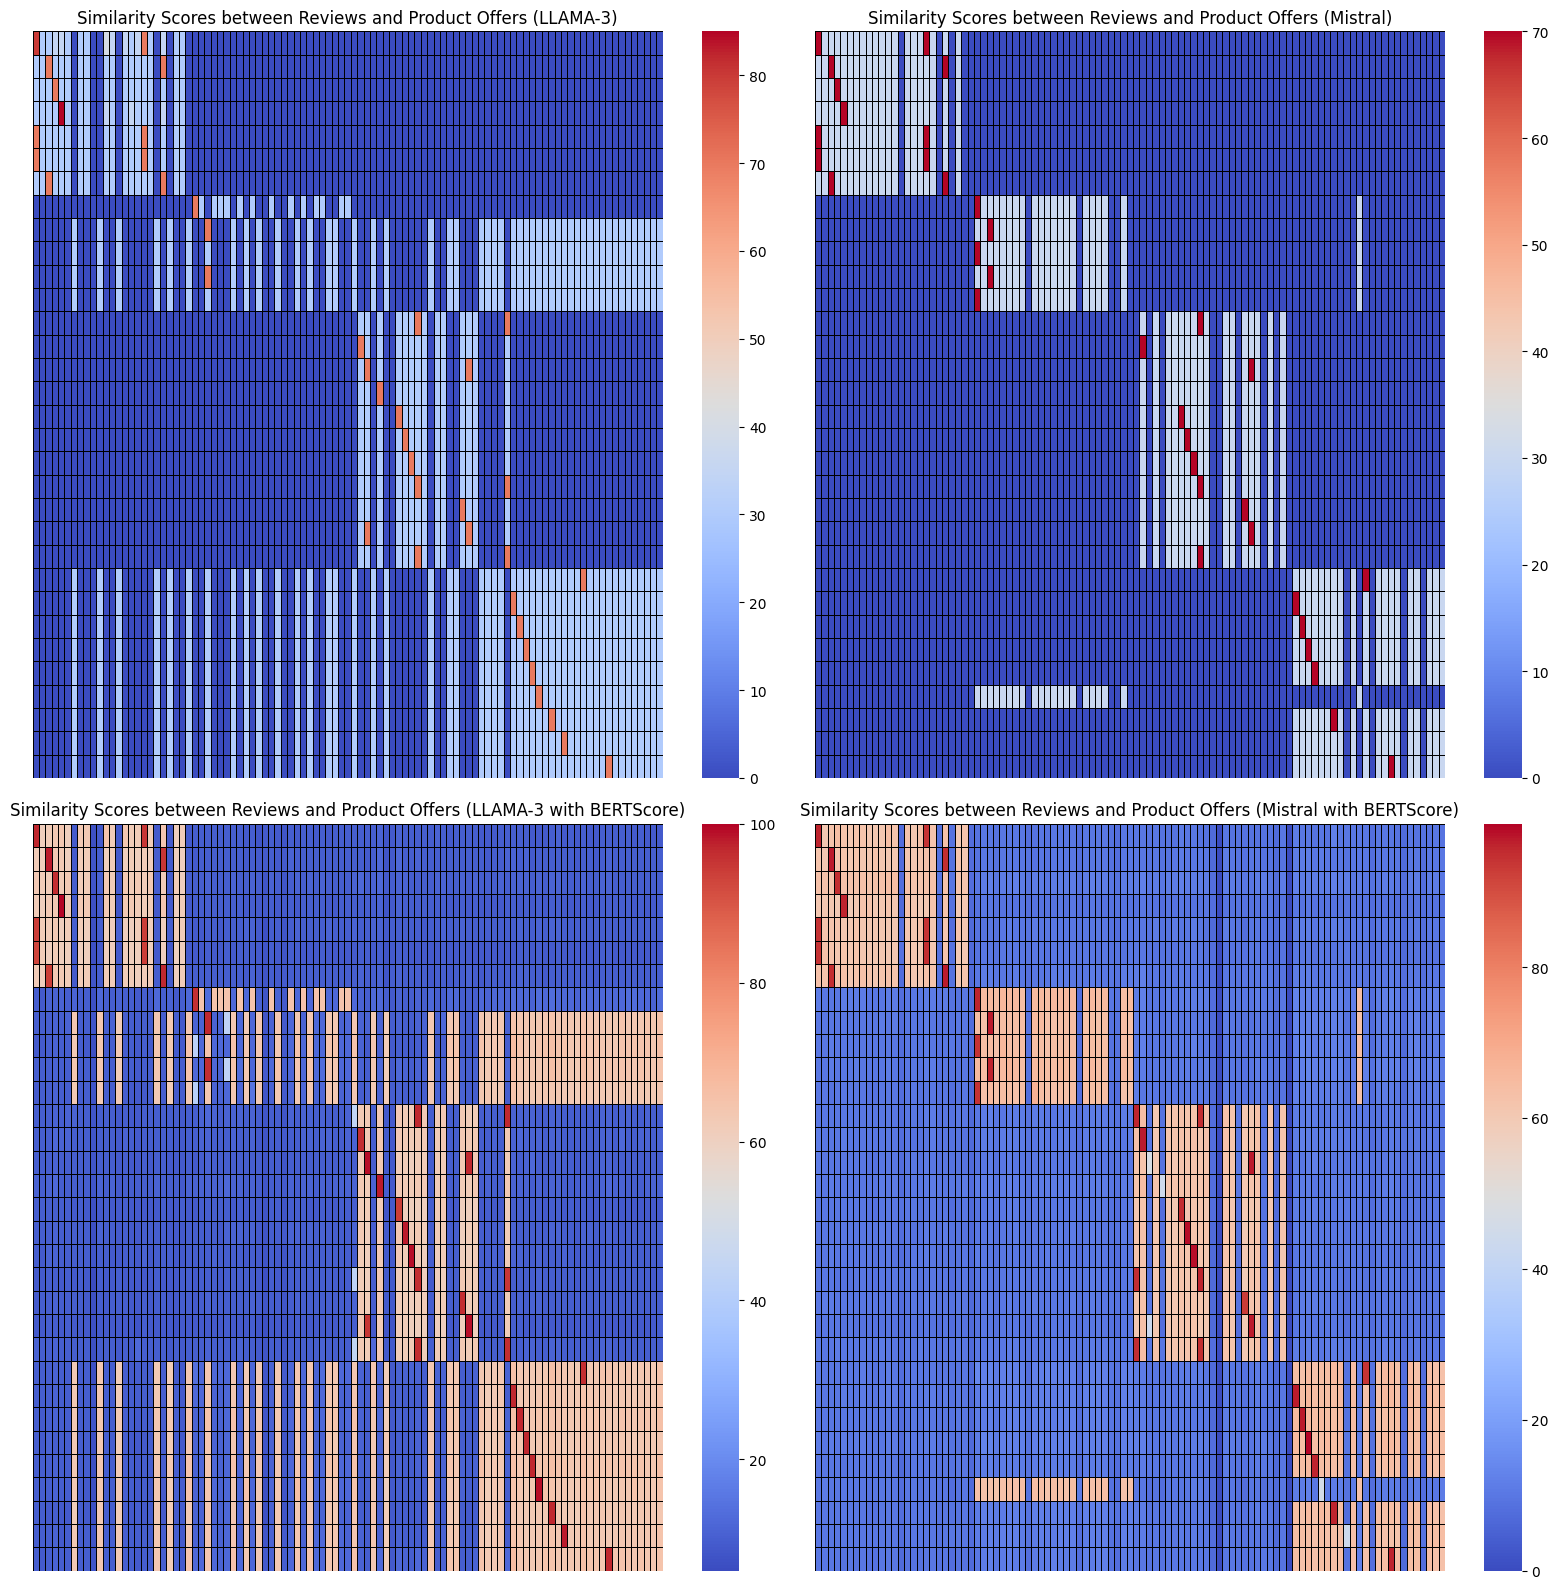

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# make subplots with mistral_df and df
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.heatmap(df.astype(float), annot=False, cmap='coolwarm', fmt=".0f", linewidths=.4, linecolor='black', ax=axs[0, 0])
axs[0, 0].set_title("Similarity Scores between Reviews and Product Offers (LLAMA-3)")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
sns.heatmap(mistral_df.astype(float), annot=False, cmap='coolwarm', fmt=".0f", linewidths=.4, linecolor='black', ax=axs[0, 1])
axs[0, 1].set_title("Similarity Scores between Reviews and Product Offers (Mistral)")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
sns.heatmap(df2.astype(float), annot=False, cmap='coolwarm', fmt=".0f", linewidths=.4, linecolor='black', ax=axs[1, 0])
axs[1, 0].set_title("Similarity Scores between Reviews and Product Offers (LLAMA-3 with BERTScore)")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
sns.heatmap(mistral_df2.astype(float), annot=False, cmap='coolwarm', fmt=".0f", linewidths=.4, linecolor='black', ax=axs[1, 1])
axs[1, 1].set_title("Similarity Scores between Reviews and Product Offers (Mistral with BERTScore)")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
plt.tight_layout()
plt.show()

Assuming that products and reviews datasets are grouped sequentially by category, we observe clear trends in the plotted data.

The heatmaps reveal that the Mistral model performed more effectively, displaying strong similarity between products and reviews within the same product category.

The llama model, on the other hand, showed high similarity even between products and reviews from different categories, which is not ideal for this task.

In [228]:
# for each product we can find the review with the highest similarity score
results = pd.DataFrame(columns=['llama_bert', 'mistral_bert'], index=products_list)
for product in products_list:
    results.at[product, 'llama_bert'] = df2.loc[product].idxmax()
    results.at[product, 'mistral_bert'] = mistral_df2.loc[product].idxmax()

In [230]:
results['is_same'] = results['llama_bert'] == results['mistral_bert']

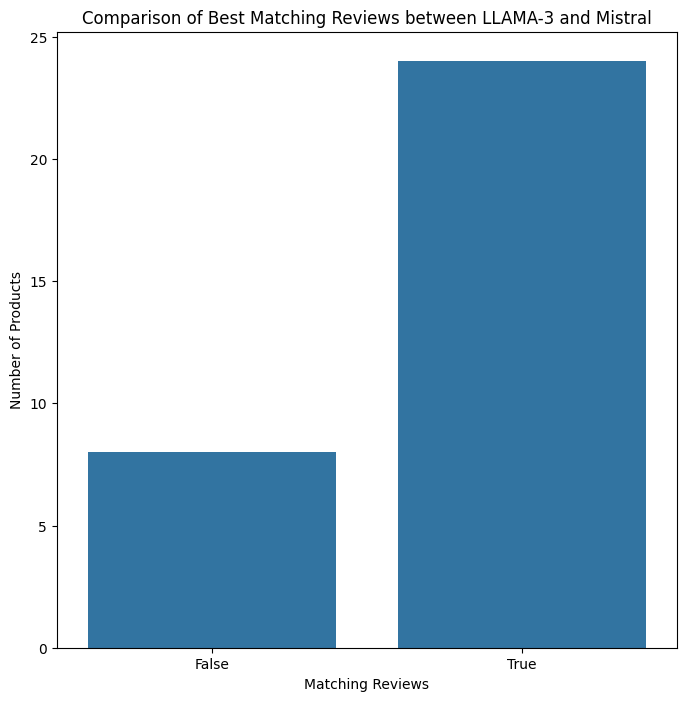

In [238]:
plt.figure(figsize=(8, 8))
sns.barplot(x=results['is_same'].value_counts().index, y=results['is_same'].value_counts().values)
plt.title("Comparison of Best Matching Reviews between LLAMA-3 and Mistral")
plt.ylabel("Number of Products")
plt.xlabel("Matching Reviews")
plt.show()

In [239]:
len(products_list)

32

For 24 out of 32 products, both models identified the same review as the most similar.